In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import pandas as pd

plt.rcParams['font.family'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False
# sns.set(style='white')
# sns.set(font='SimHei')
# plt.figure(figsize=(16, 9))
sns.set_context({'figure.figsize':[16, 9]})

In [79]:
FONTSIZE_TICKS = 20  # 坐标点
FONTSIZE_LABEL = 20  # 坐标标题，图例
FONTSIZE_TEXT = 18  # 曲线上的文字
FONTSIZE_LEGEND = 16 # 图例

In [40]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [41]:
# plt.style.use('seaborn-white')

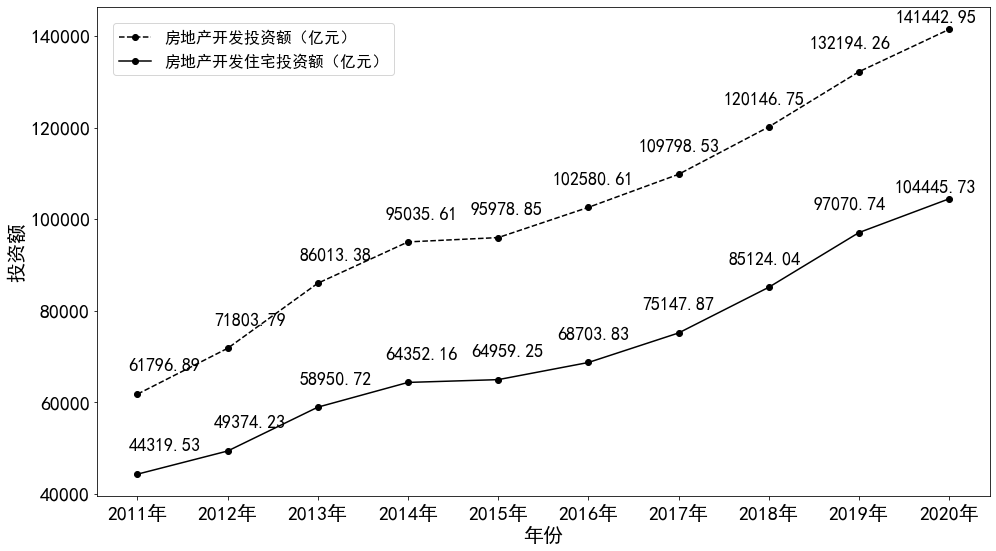

In [80]:
# 图1 #######################

total_list = [61796.89, 71803.79, 86013.38, 95035.61, 95978.85, 102580.61, 109798.53, 120146.75, 132194.26, 141442.95]
house_list = [44319.53, 49374.23, 58950.72, 64352.16, 64959.25, 68703.83, 75147.87, 85124.04, 97070.74, 104445.73] 
years = []

for i in range(len(total_list)):
    years.append(f'{2011 + i}年')

assert len(years) == len(house_list)

plt.plot(years, total_list, marker = 'o', color = 'black', linestyle = 'dashed')
plt.plot(years, house_list, marker = 'o', color = 'black', linestyle = 'solid')

plt.ylabel('投资额', fontsize = FONTSIZE_LABEL)
plt.xlabel('年份', fontsize = FONTSIZE_LABEL)
plt.xticks(fontsize = FONTSIZE_TICKS)
plt.yticks(fontsize = FONTSIZE_TICKS)

plt.legend(['房地产开发投资额（亿元）', '房地产开发住宅投资额（亿元）'], loc = 'upper left', fontsize = FONTSIZE_LEGEND, borderaxespad = 1)
index = 0
for v1, v2 in zip(total_list, house_list):
    x_offset = 0.3 - index * 0.05
    y_offset = 5000
    if index == len(total_list) - 1:
        y_offset = 1500
    plt.text(index + x_offset, v1 + y_offset, v1, ha='center', color='black', fontsize = FONTSIZE_TEXT)
    plt.text(index + x_offset, v2 + y_offset, v2, ha='center', color='black', fontsize = FONTSIZE_TEXT)
    index += 1
# plt.show()
plt.savefig('图4-1.png')

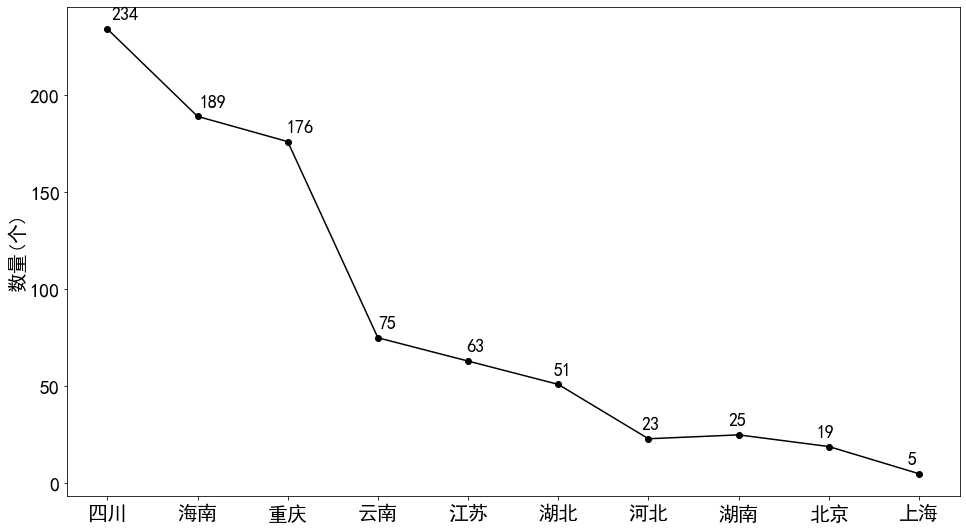

In [81]:
# 图2 #######################
y = [234, 189, 176, 75, 63, 51, 23, 25, 19, 5]
x = ['四川', '海南', '重庆', '云南', '江苏', '湖北', '河北', '湖南', '北京', '上海']
plt.plot(x, y, color = 'black', marker = 'o')
plt.ylabel('数量(个)', fontsize = FONTSIZE_LABEL)
plt.xticks(fontsize = FONTSIZE_TICKS)
plt.yticks(fontsize = FONTSIZE_TICKS)

index = 0
for val in y:
    plt.text(index + 0.2 - index * 0.03, val + 5, val, ha='center', color='black', fontsize = FONTSIZE_TEXT)
    index += 1

# plt.show()
plt.savefig('图4-2.png')



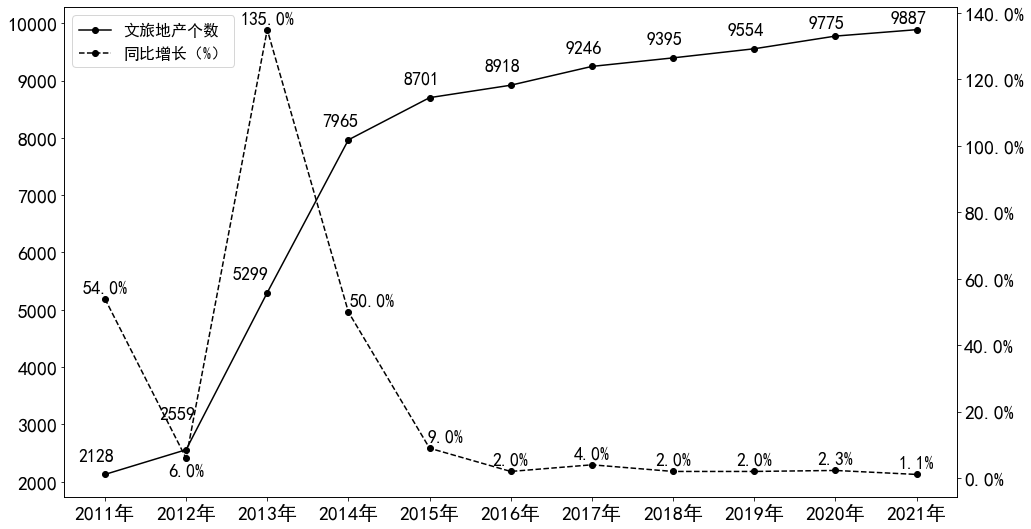

In [147]:
# 图3 #######################
fig, ax1 = plt.subplots(figsize=(16, 9))
ax2 = ax1.twinx()
y1 = [2128, 2559, 5299, 7965, 8701, 8918, 9246, 9395, 9554, 9775, 9887]
y2 = [54.0, 6.0, 135.0, 50.0, 9.0, 2.0, 4.0, 2.0, 2.0, 2.3, 1.1]
years = [f'{2011 + i}年' for i in range(11)]
g1, = ax1.plot(range(len(y1)), y1, color = 'black',marker = 'o', label='文旅地产个数')
ax1.tick_params(axis='x', labelsize=FONTSIZE_TICKS)
ax1.tick_params(axis='y', labelsize=FONTSIZE_TICKS)
ax1.set_xticks(range(len(y1)))
ax1.set_xticklabels(years)
for index, val in enumerate(y1):
    x_offset = -0.1
    y_offset = 200
    if index == 0:
        y_offset = 200
    elif index == 1:
        y_offset = 500
    elif index == 2:
        x_offset = -0.2
    elif index == len(y1) - 2:
        y_offset = 100
    elif index == len(y1) - 1:
        y_offset = 80
    ax1.text(index + x_offset, val + y_offset, val, ha='center', va='bottom', color='black', fontsize = FONTSIZE_TEXT)
ax2.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.1f%%'))
ax2.tick_params(axis = 'y', labelsize = FONTSIZE_TICKS)
g2, = ax2.plot(years, y2, color='black', marker ='o', linestyle = 'dashed', label='同比增长（%）')   # ax2.plot返回是一个数组，现只取该数组第一个元素
for index, val in enumerate(y2):
    y_offset = 1.3
    x_offset = 0
    if index == 1:
        y_offset = -6
    elif index == 3:
        x_offset = 0.3
    elif index == 4:
        x_offset = 0.2
    ax2.text(index + x_offset, val + y_offset, '{:.1f}%'.format(val), ha='center', va='bottom', color='black', fontsize=FONTSIZE_TEXT)

plt.legend([g1, g2], ['文旅地产个数', '同比增长（%）'], loc='upper left', fontsize = FONTSIZE_LEGEND)


# plt.show()
plt.savefig('图4-3.png')

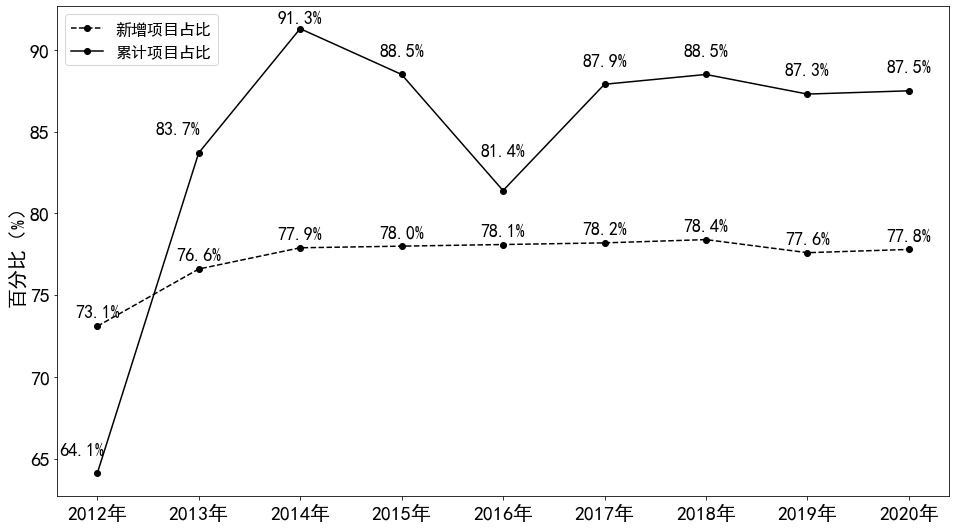

In [196]:
# 图4 #######################
fig, ax = plt.subplots(figsize=(16, 9))
y1 = [73.1, 76.6, 77.9, 78.0, 78.1, 78.2, 78.4, 77.6, 77.8]
y2 = [64.1, 83.7, 91.3, 88.5, 81.4, 87.9, 88.5, 87.3, 87.5]
years = [f'{2012 + i}年' for i in range(len(y1))]
ax.set_xticks(range(len(y1)), fontsize = FONTSIZE_TICKS)
ax.set_xticklabels(years, fontsize = FONTSIZE_LABEL)
g1, = ax.plot(range(len(y1)), y1, color='black', marker='o', linestyle = 'dashed')
g2, = ax.plot(range(len(y2)), y2, color='black', marker='o')
for index, val in enumerate(y1):
    x_offset1 = 0
    y_offset1 = 0.4
    x_offset2 = 0
    y_offset2 = 1
    if index == 0:
        x_offset2 = -0.15
    elif index == 1:
        x_offset2 = -0.2
    elif index == 2:
        y_offset2 = 0.2
    elif index == 4:
        y_offset2 = 2
        
    ax.text(index + x_offset1, val + y_offset1, '{:.1f}%'.format(val), ha='center', va='bottom', color='black', fontsize = FONTSIZE_TEXT)
    ax.text(index + x_offset2, y2[index] + y_offset2, '{:.1f}%'.format(y2[index]), ha='center', va='bottom', color='black', fontsize = FONTSIZE_TEXT)
plt.legend([g1, g2], ['新增项目占比', '累计项目占比'], loc = 'upper left', fontsize = FONTSIZE_LEGEND)
plt.ylabel('百分比（%）', fontsize = FONTSIZE_LABEL)
plt.yticks(fontsize = FONTSIZE_TICKS)
plt.savefig('图4-4.png')

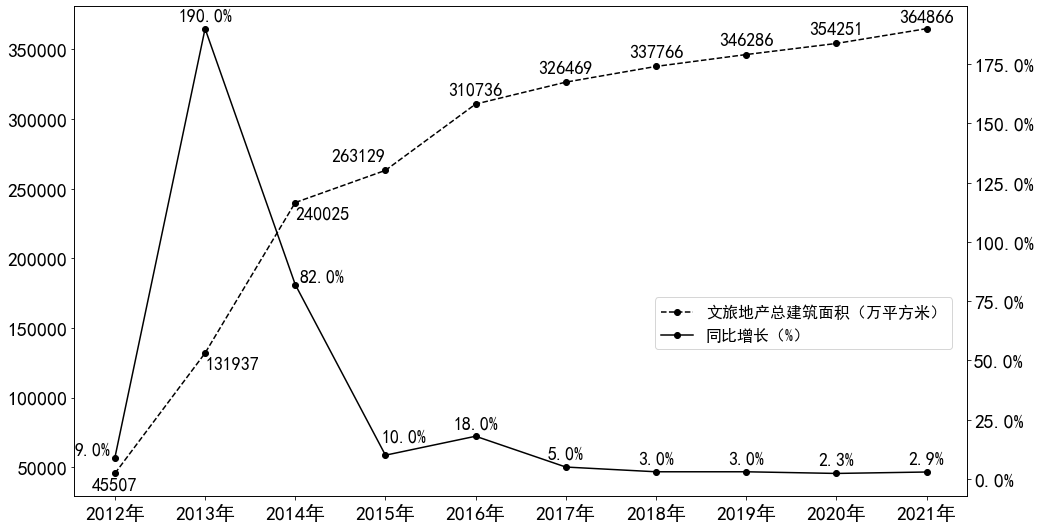

In [175]:
# 图5-1 #######################
fig, ax1 = plt.subplots(figsize=(16, 9))
ax2 = ax1.twinx()
y1 = [45507, 131937, 240025, 263129, 310736, 326469, 337766, 346286, 354251, 364866]
y2 = [9.0, 190.0, 82.0, 10.0, 18.0, 5.0, 3.0, 3.0, 2.3, 2.9]
years = [f'{2012 + i}年' for i in range(10)]
g1, = ax1.plot(range(len(y1)), y1, label='文旅地产总建筑面积（万平方米）', marker = 'o', linestyle = 'dashed', color = 'black')
ax1.set_xticks(range(len(y1)), fontsize = FONTSIZE_TICKS)
ax1.set_xticklabels(years, fontsize = FONTSIZE_LABEL)
ax1.tick_params(axis='x', labelsize=FONTSIZE_TICKS)
ax1.tick_params(axis='y', labelsize=FONTSIZE_TICKS)
for index, val in enumerate(y1):
    x_offset = 0
    y_offset = 5000
    if index == 0:
        y_offset = -13000
    elif index == 1:
        x_offset = 0.3
        y_offset = -13000
    elif index == 2:
        x_offset = 0.3
        y_offset = -13000
    elif index == 3:
        x_offset = -0.3
    elif index == len(y1) - 1:
        y_offset = 3000
    ax1.text(index + x_offset, val + y_offset, val, ha='center', va='bottom', color='black', fontsize = FONTSIZE_TEXT)
ax2.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.1f%%'))
ax2.tick_params(axis = 'y', labelsize = FONTSIZE_TICKS)
g2, = ax2.plot(years, y2, color='black', marker = 'o', label='同比增长（%）')   # ax2.plot返回是一个数组，现只取该数组第一个元素
for index, val in enumerate(y2):
    y_offset = 0.5
    x_offset = 0
    if index == 0:
        x_offset = -0.25
    elif index == 2:
        x_offset = 0.3
    elif index == 3:
        x_offset = 0.2
        y_offset = 5
    else:
        y_offset += 2
    ax2.text(index + x_offset, val + y_offset, '{:.1f}%'.format(val), ha='center', va='bottom', color='black', fontsize = FONTSIZE_TEXT)

plt.legend([g1, g2], ['文旅地产总建筑面积（万平方米）', '同比增长（%）'], loc=(0.65, 0.3), fontsize = FONTSIZE_LEGEND)
plt.savefig('图4-5.png')

In [ ]:
# 图5-2 #######################
fig, ax1 = plt.subplots(figsize=(16, 9))
ax2 = ax1
ax3 = ax1.twinx()
bar_width = 0.4
y1 = [22124, 30714, 37123, 32891, 44953, 58376, 52755, 54130, 59810, 60164, 59172]
y2 = [8263, 8318, 8796, 9007, 9875, 10471, 10857, 12233, 13189, 14184, 15700]
y3 = [-7.1, 38.8, 20.9, -10.2, 36.7, 29.9, -9.6, 2.6, 10.5, 0.6, -1.6]
years = [f'{2011 + i}年' for i in range(11)]
x1 = [i - bar_width / 2 for i in range(len(y1))]
x2 = [i + bar_width / 2 for i in range(len(y1))]
g1 = ax1.bar(x1, y1, width=bar_width, label='普通住宅成交面积（万平方米）')
ax1.set_xticks(range(len(y1)))
ax1.set_xticklabels(years)
for index, val in enumerate(y1):
    ax1.text(index - 0.2, val, val, ha='center', va='bottom', color='black', fontsize=10)

g2 = ax2.bar(x2, y2, width=bar_width, label='均价（元/平方米）', color='orange')
for index, val in enumerate(y2):
    ax2.text(index + 0.2, val, val, ha='center', va='bottom', color='black', fontsize=10)

ax3.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.1f%%'))
g3, = ax3.plot(years, y3, color='gray', label='成交面积增长')   # ax2.plot返回是一个数组，现只取该数组第一个元素
for index, val in enumerate(y3):
    ax3.text(index, val, '{:.1f}%'.format(val), ha='center', va='bottom', color='black', fontsize=10)
ax1.grid(False)
ax2.grid(False)
ax3.grid(False)
plt.legend([g1, g2, g3], ['普通住宅成交面积（万平方米）', '均价（元/平方米）', '成交面积增长'], loc='upper left')
plt.show()